# Convert µs-ALEX SM files to Photon-HDF5

<p class="lead">This <a href="https://jupyter.org/">Jupyter notebook</a>
will guide you through the conversion of a µs-ALEX data file from <b>SM</b> (WeissLab)
to <a href="http://photon-hdf5.org">Photon-HDF5</a> format. For more info on how to edit
a jupyter notebook refer to <a href="http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb#Overview-of-the-Notebook-UI">this example</a>.</p>

<i>Please send feedback and report any problem to the 
[Photon-HDF5 google group](https://groups.google.com/forum/#!forum/photon-hdf5).</i>

# 1. How to run it?

The notebook is composed by "text cells", such as this paragraph, and "code cells"
containing the code to be executed (and identified by an `In [ ]` prompt). 
To execute a code cell, select it and press **SHIFT+ENTER**. 
To modify an cell, click on it to enter "edit mode" (indicated by a green frame), 
then type.

You can run this notebook directly online (for demo purposes), or you can 
run it on your on desktop. For a local installation please refer to:

- [Jupyter Notebook Quick-Start Guide](http://jupyter-notebook-beginner-guide.readthedocs.org) 

<br>
<div class="alert alert-info">
Please run each each code cell using <b>SHIFT+ENTER</b>.
</div>

# 2. Prepare the data file

## 2.1 Upload the data file

<br>
<div class="alert alert-info">
<b>Note:</b> if you are running the notebook locally skip to section <b>2.2</b>.
</div>

Before starting, you have to upload a data file to be converted to Photon-HDF5.
You can use one of our example data files available
[on figshare](http://dx.doi.org/10.6084/m9.figshare.1455963). 

To upload a file (up to 35 MB) switch to the "Home" tab in your browser, 
click the upload button and select the data file. 
Wait until the upload completes.
For larger files (like some of our example files) please use the 
[Upload notebook](Upload data files.ipynb) instead.

Once the file is uploaded, come back here and follow the instructions below.

## 2.2 Select the file

Specify the input data file in the following cell:

In [1]:
filename = 'data/0023uLRpitc_NTP_20dT_0.5GndCl.sm'

The next cell will check if the `filename` location is correct:

In [2]:
import os
try: 
    with open(filename): pass
    print('Data file found, you can proceed.')
except IOError:
    print('ATTENTION: Data file not found, please check the filename.\n'
          '           (current value "%s")' % filename)

Data file found, you can proceed.


In case of file not found, please double check the file name
and that the file has been uploaded.

# 3. Load the data

We start by loading the software:

In [3]:
%matplotlib inline
import numpy as np
import sys
sys.path.append("../../phconvert")
import phconvert as phc
print('phconvert version: ' + phc.__version__)

phconvert version: 0.9+43.g3a86e58.dirty


Then we load the input file:

In [4]:
d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2180, 3900),
                         alex_period_acceptor = (200, 1800),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

 - Loading 'data/0023uLRpitc_NTP_20dT_0.5GndCl.sm' ... 
 [DONE]



And we plot the alternation histogram:

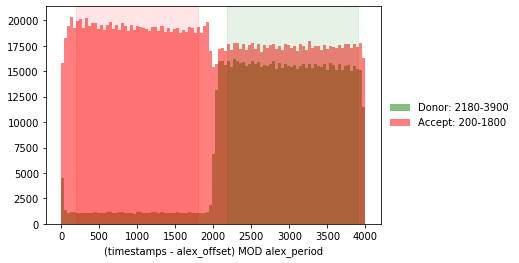

In [5]:
phc.plotter.alternation_hist(d)

The previous plot is the alternation histogram for the donor and acceptor channel separately.
The shaded areas marks the donor (*green*) and acceptor (*red*) excitation periods.

If the histogram looks wrong in some aspects (no photons, wrong detectors
assignment, wrong period selection) please go back to the previous cell 
which loads the file and change the parameters until the histogram looks correct.

You may also find useful to see how many different detectors are present
and their number of photons. This information is shown in the next cell:

In [6]:
detectors = d['photon_data']['detectors']

print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))

Detector    Counts
--------   --------
       0     839592
       1    1844370


# 4. Metadata

In the next few cells, we specify some metadata that will be stored 
in the Photon-HDF5 file. Please modify these fields to reflect
the content of the data file:

In [7]:
author = 'John Doe'
author_affiliation = 'Research Institution'
description = 'us-ALEX measurement of a doubly-labeled ssDNA sample.'
sample_name = '20dt ssDNA oligo doubly labeled with Cy3B and Atto647N'
dye_names = 'Cy3B, ATTO647N'
buffer_name = 'TE50 + 0.5M GndCl'

# 5. Conversion
<br>
<div class="alert alert-success">
<p>Once you finished editing the the previous sections you can proceed with
the actual conversion. To do that, click on the menu <i>Cells -> Run All Below</i>.

<p>After the execution go to <b>Section 6</b> to download the Photon-HDF5 file.
</div>

The cells below contain the code to convert the input file to Photon-HDF5.

## 5.1 Add metadata

In [8]:
d['description'] = description

d['sample'] = dict(
    sample_name=sample_name,
    dye_names=dye_names,
    buffer_name=buffer_name,
    num_dyes = len(dye_names.split(',')))

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation)

## 5.2 Save to Photon-HDF5

This command saves the new file to disk. If the input data does not follows the Photon-HDF5 specification it returns an error (`Invalid_PhotonHDF5`) printing what violates the specs.

In [9]:
phc.hdf5.save_photon_hdf5(d, overwrite=True)

Saving: data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5


You can check it's content by using an HDF5 viewer such as [HDFView](https://www.hdfgroup.org/products/java/hdfview/).

# 6. Load Photon-HDF5

We can load the newly created Photon-HDF5 file to check its content:

In [10]:
from pprint import pprint

In [11]:
filename = d['_data_file'].filename

In [12]:
h5data = phc.hdf5.load_photon_hdf5(filename)

In [13]:
phc.hdf5.dict_from_group(h5data.identity)

{'author': 'John Doe',
 'author_affiliation': 'Research Institution',
 'creation_time': '2020-05-07 20:52:04',
 'filename': '0023uLRpitc_NTP_20dT_0.5GndCl.hdf5',
 'filename_full': '/Users/yi10/Desktop/Research/Projects/4cALEX/phconvert/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5',
 'format_name': 'Photon-HDF5',
 'format_url': 'http://photon-hdf5.org/',
 'format_version': '0.5rc1',
 'software': 'phconvert',
 'software_version': '0.9+43.g3a86e58.dirty'}

In [14]:
phc.hdf5.dict_from_group(h5data.setup)

{'detection_wavelengths': array([5.8e-07, 6.8e-07]),
 'detectors': {'counts': array([ 839592, 1844370]),
  'id': array([0, 1], dtype=uint32),
  'id_hardware': array([0, 1], dtype=uint32)},
 'excitation_alternated': array([1, 1], dtype=uint8),
 'excitation_cw': array([1, 1], dtype=uint8),
 'excitation_wavelengths': array([5.32e-07, 6.35e-07]),
 'lifetime': 0,
 'modulated_excitation': 1,
 'num_pixels': 2,
 'num_polarization_ch': 1,
 'num_spectral_ch': 2,
 'num_split_ch': 1,
 'num_spots': 1}

In [15]:
pprint(phc.hdf5.dict_from_group(h5data.photon_data))

{'detectors': array([0, 1, 1, ..., 1, 1, 0], dtype=uint32),
 'measurement_specs': {'alex_excitation_period1': [2180, 3900],
                       'alex_excitation_period2': [200, 1800],
                       'alex_offset': 700,
                       'alex_period': 4000,
                       'detectors_specs': {'spectral_ch1': array([0], dtype=uint32),
                                           'spectral_ch2': array([1], dtype=uint32)},
                       'measurement_type': 'smFRET-usALEX'},
 'timestamps': array([     146847,      188045,      294124, ..., 47999863658,
       47999877783, 47999955353]),
 'timestamps_specs': {'timestamps_unit': 1.25e-08}}


In [16]:
h5data._v_file.close()